In [54]:
import matplotlib.pyplot as plt
import numpy as np
from random import uniform
from numpy.random import rand

## PAYSAGE ACCIDENTE

**Soit $D\in{[-3,3]*[-3,3]}$ et posons :**

In [197]:
f = lambda x, y :  np.exp(np.sin(50*x)) + np.sin(60*np.exp(y)) + np.sin(70*np.sin(x)) + np.sin(np.sin(80*y)) - np.sin(10*(x+y)) + (1/4)*(x**2 + y**2)

**L'objectif est d'étudier la fonction $f$ à l'aide de visualisations et de trouver, à l'aide du recuit simulé
une approximation du minimum de la fonction $f$ sur $D$.**

### Question 1

**Visualisons la courbe representative de la fonction $x\rightarrow{f(x,0.5)}$, $x\in{[-3,3]}$.**

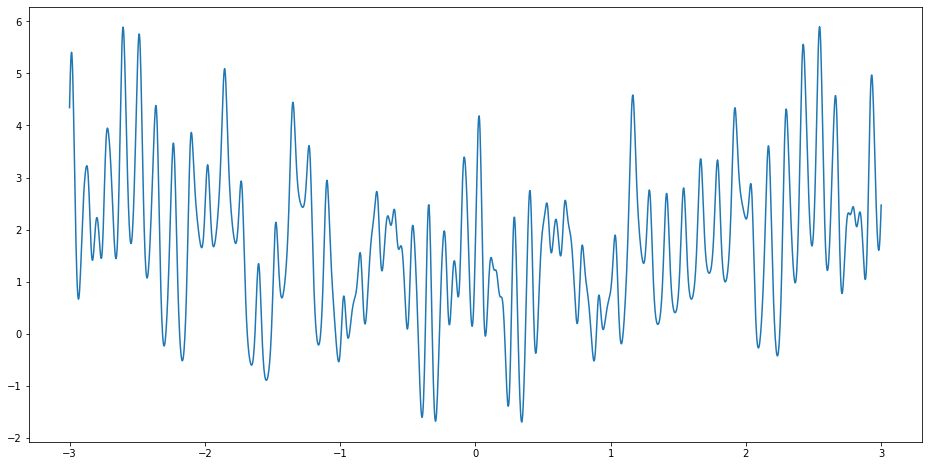

In [426]:
x = np.linspace(-3, 3, 2000)
                
plt.figure(figsize=(16, 8))
plt.plot(x, f(x, 0.5))
plt.show()

### Question 2

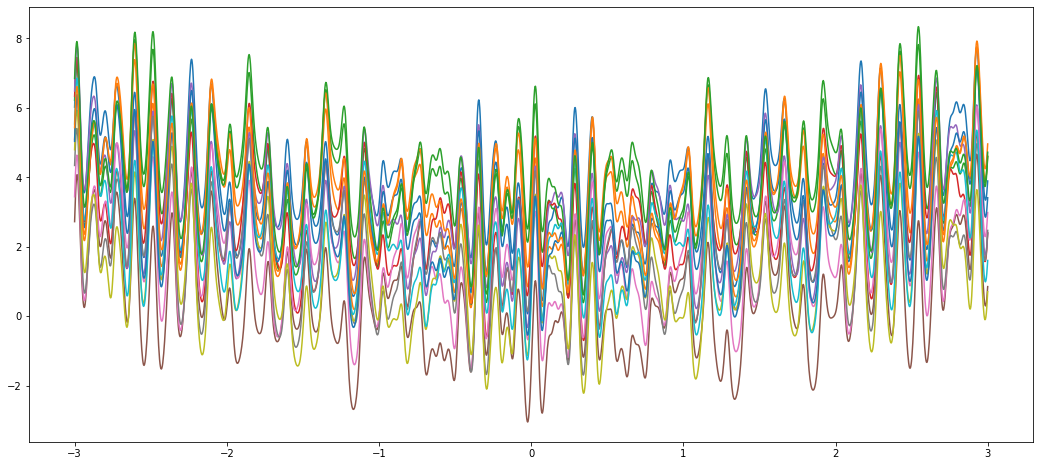

In [429]:
x = np.linspace(-3, 3, 2000)

plt.figure(figsize=(18, 8))
for a in np.arange(-3, 3.5, 0.5):
    plt.plot(x, f(x, a))
plt.show()

**Ici on peut aussi visualiser autrement notre fonction en 3d avec "np.meshgrid" et "pltot.surface".**

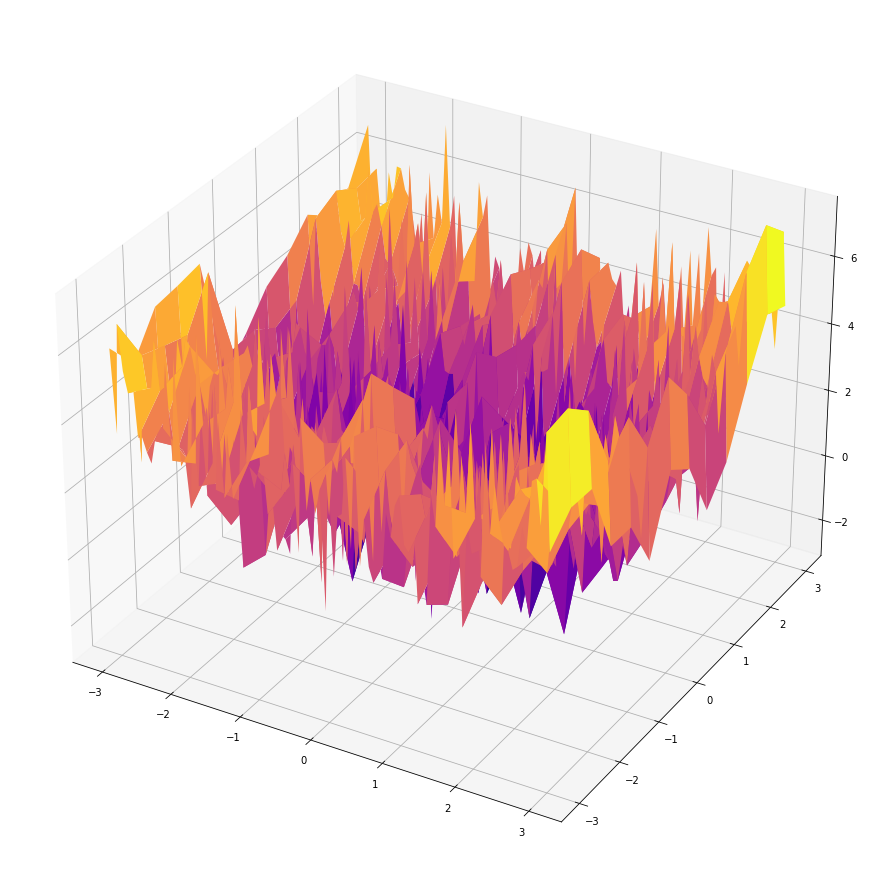

In [386]:
x = np.linspace(-3, 3, 100)
y = [a for a in np.arange(-3, 3.5, 0.5)]
x, y = np.meshgrid(x, y)
z = f(x,y)

plt.figure(figsize=(18, 16))
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, z, cmap='plasma')
plt.show()

### Question 3

In [341]:
x = np.linspace(-3, 3, 30)

for a in np.arange(-3, 3.5, 0.5):
    g_a = f(x, a)
    
print("le minimum de toutes les valeurs de la fonction g_a est :", np.min(g_a))

le minimum de toutes les valeurs de la fonction g_a est : 1.4089563112451713


### Question 4

In [342]:
x = np.random.uniform(-3, 3, 1000)
y = np.random.uniform(-3, 3, 1000)

f_min = np.min(f(x, y))
print("le minimum des valeurs de la fonction f est :", f_min)

le minimum des valeurs de la fonction f est : -2.1571475199755152


**Visualisons l'allure de la fonction $f(x,y)$ avec les x et y suivant une loi uniforme.**

**En 2 dimensions :**

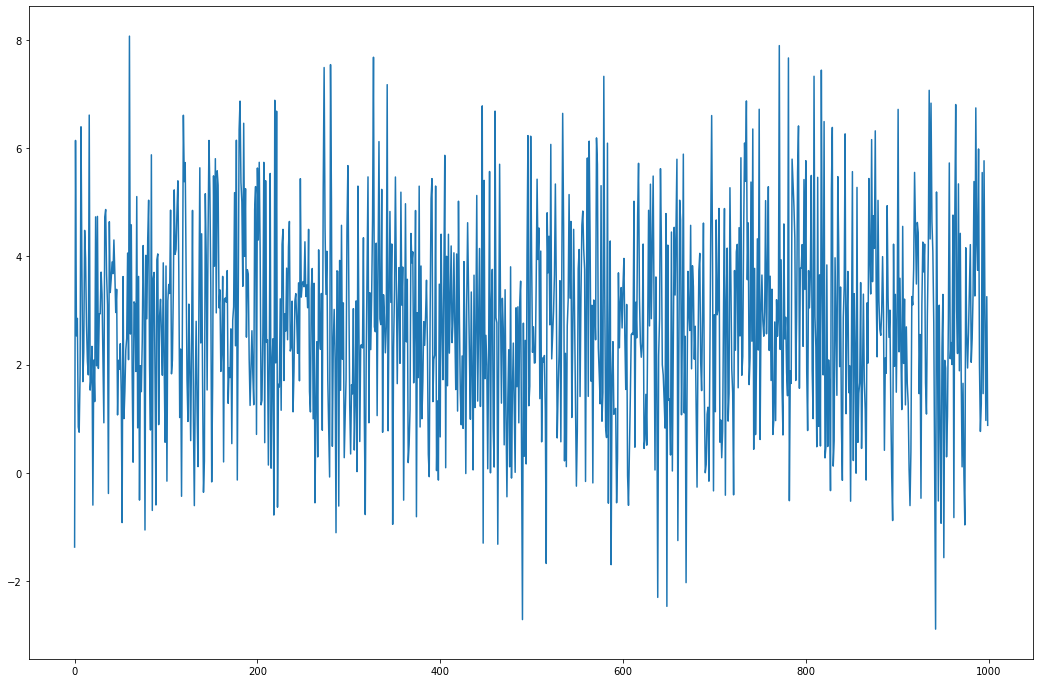

In [424]:
x = np.random.uniform(-3, 3, 1000)
y = np.random.uniform(-3, 3, 1000)

plt.figure(figsize=(18, 12))
plt.plot(f(x,y))
plt.show()

**Ou encore en 3d :**

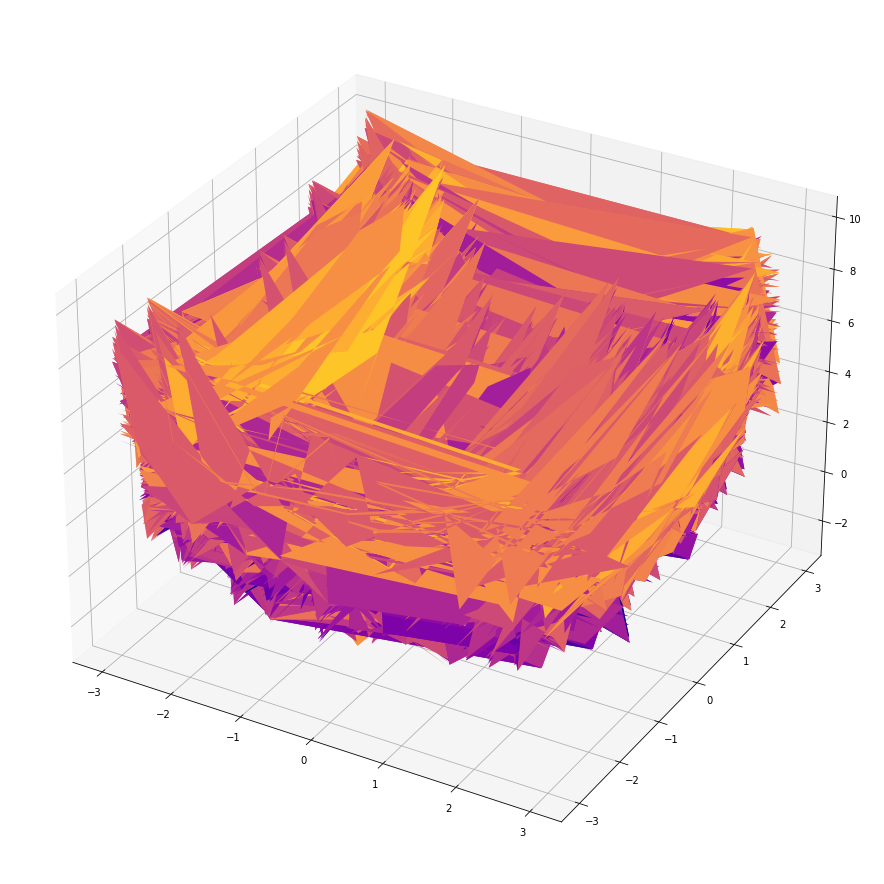

In [385]:
x = np.random.uniform(-3, 3, 1000)
y = np.random.uniform(-3, 3, 1000)
x, y = np.meshgrid(x, y)
z = f(x,y)

plt.figure(figsize=(20, 16))
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, z, cmap='plasma')
plt.show()

**Utilisons plusieurs expériences pour déterminer la moyenne des minimums de la fonction f :**

In [344]:
n=1000
L=[]
for _ in range (n):
    x = np.random.uniform(-3, 3, 1000)
    y = np.random.uniform(-3, 3, 1000)
    f_min = f(x, y)
    c = np.min(f_min)
    L.append(c)

print("la moyenne du minimum des valeurs de la fonction est :", np.mean(L))

la moyenne du minimum des valeurs de la fonction est : -2.30921504871657


In [346]:
n=10000
L=[]
for _ in range (n):
    x = np.random.uniform(-3, 3, 1000)
    y = np.random.uniform(-3, 3, 1000)
    f_min = f(x, y)
    c = np.min(f_min)
    L.append(c)

print("la moyenne du minimum des valeurs de la fonction est :", np.mean(L))

la moyenne du minimum des valeurs de la fonction est : -2.3161008190042773


In [339]:
n=100000
L=[]
for _ in range (n):
    x = np.random.uniform(-3, 3, 1000)
    y = np.random.uniform(-3, 3, 1000)
    f_min = f(x, y)
    c = np.min(f_min)
    L.append(c)

print("la moyenne du minimum des valeurs de la fonction est :", np.mean(L)

-2.31675678492702

In [343]:
n=1000000
L=[]
for _ in range (n):
    x = np.random.uniform(-3, 3, 1000)
    y = np.random.uniform(-3, 3, 1000)
    f_min = f(x, y)
    c = np.min(f_min)
    L.append(c)

print("la moyenne du minimum des valeurs de la fonction est :", np.mean(L))

la moyenne du minimum des valeurs de la fonction est : -2.316374793706977


**Malgré l'augmentation des differentes valeurs du nombre d'experiences, la moyenne du minimum des valeurs de la fonction ne varie pas vraiment (de l'ordre de ${10}^{-6}$).**

**Ce minimum est plus petit que celui obtenu à la question précédente. Le minimum de la question précédente est un minimum local.**

### Question 5

**Visualisons la trajectoire d'une marche aléatoire de N = 2000 pas.**

**Commencons par ecrire une fonction pour faire un pas :**

In [350]:
def un_pas(x, y):
    # On fait un pas suivant les lois uniformes dans un petit voisinage
    # de la position actuelle (x, y). On rejete tout déplacement au delà 
    # de [-3, 3].
    delta = 0.5  # paramètre loi uniforme
    while True:
        pas1 = - delta + 2 * delta * rand()  # unif dans [-delta, delta]
        pas2 = - delta + 2 * delta * rand()  # # unif dans [-delta, delta]
        if -3 <= x + pas1 <= 3 and -3 <= y + pas2 <= 3:
                return x + pas1, y + pas2

In [351]:
# test !!
un_pas(0, 0)

(0.4256984779704752, -0.04837986110846737)

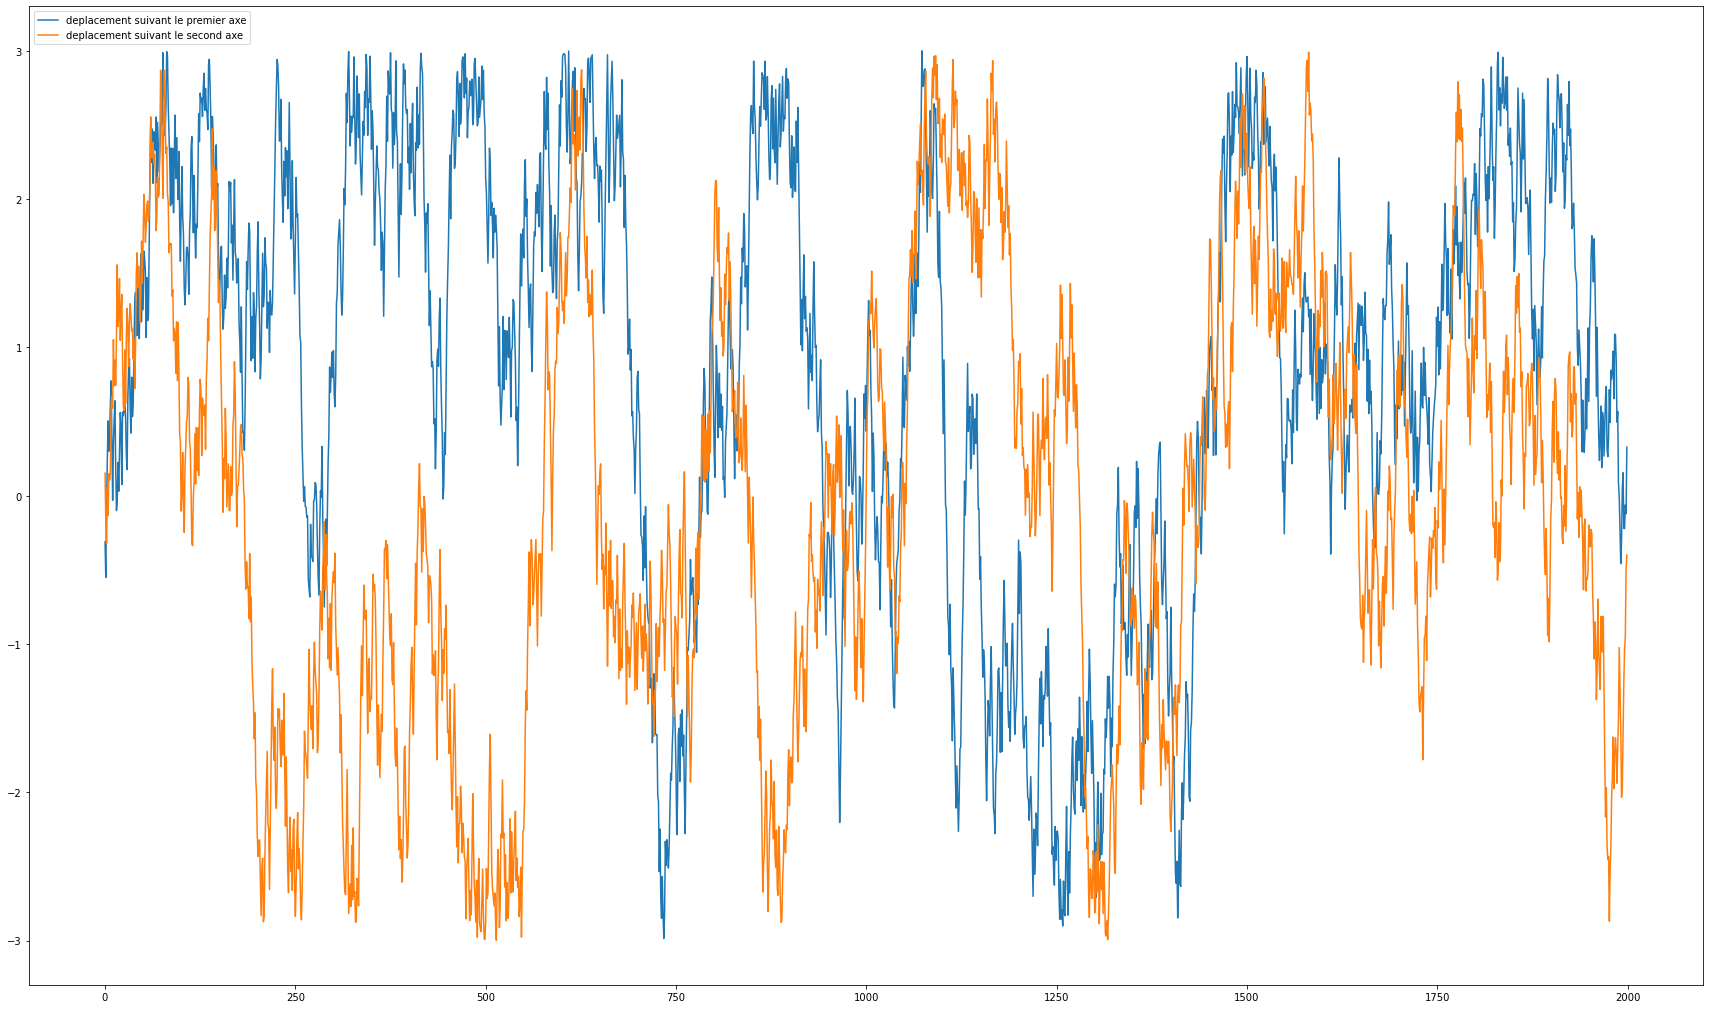

In [404]:
# Première étape: marche aléatoire simple
# Visualiser une trajectoire

pos_act = (0, 0)
trajectoire = []
for _ in range(2000):
    pos_act = un_pas(*pos_act)   # post_act contient 2 valeurs d'où le *
    trajectoire.append(pos_act)
plt.figure(figsize=(30, 18))
plt.plot(trajectoire)
plt.legend(("deplacement suivant le premier axe", "deplacement suivant le second axe"), loc='upper left')
plt.show()

**Visualisons les valeurs de la fonction f aux points visités par cette marche aléatoire :**

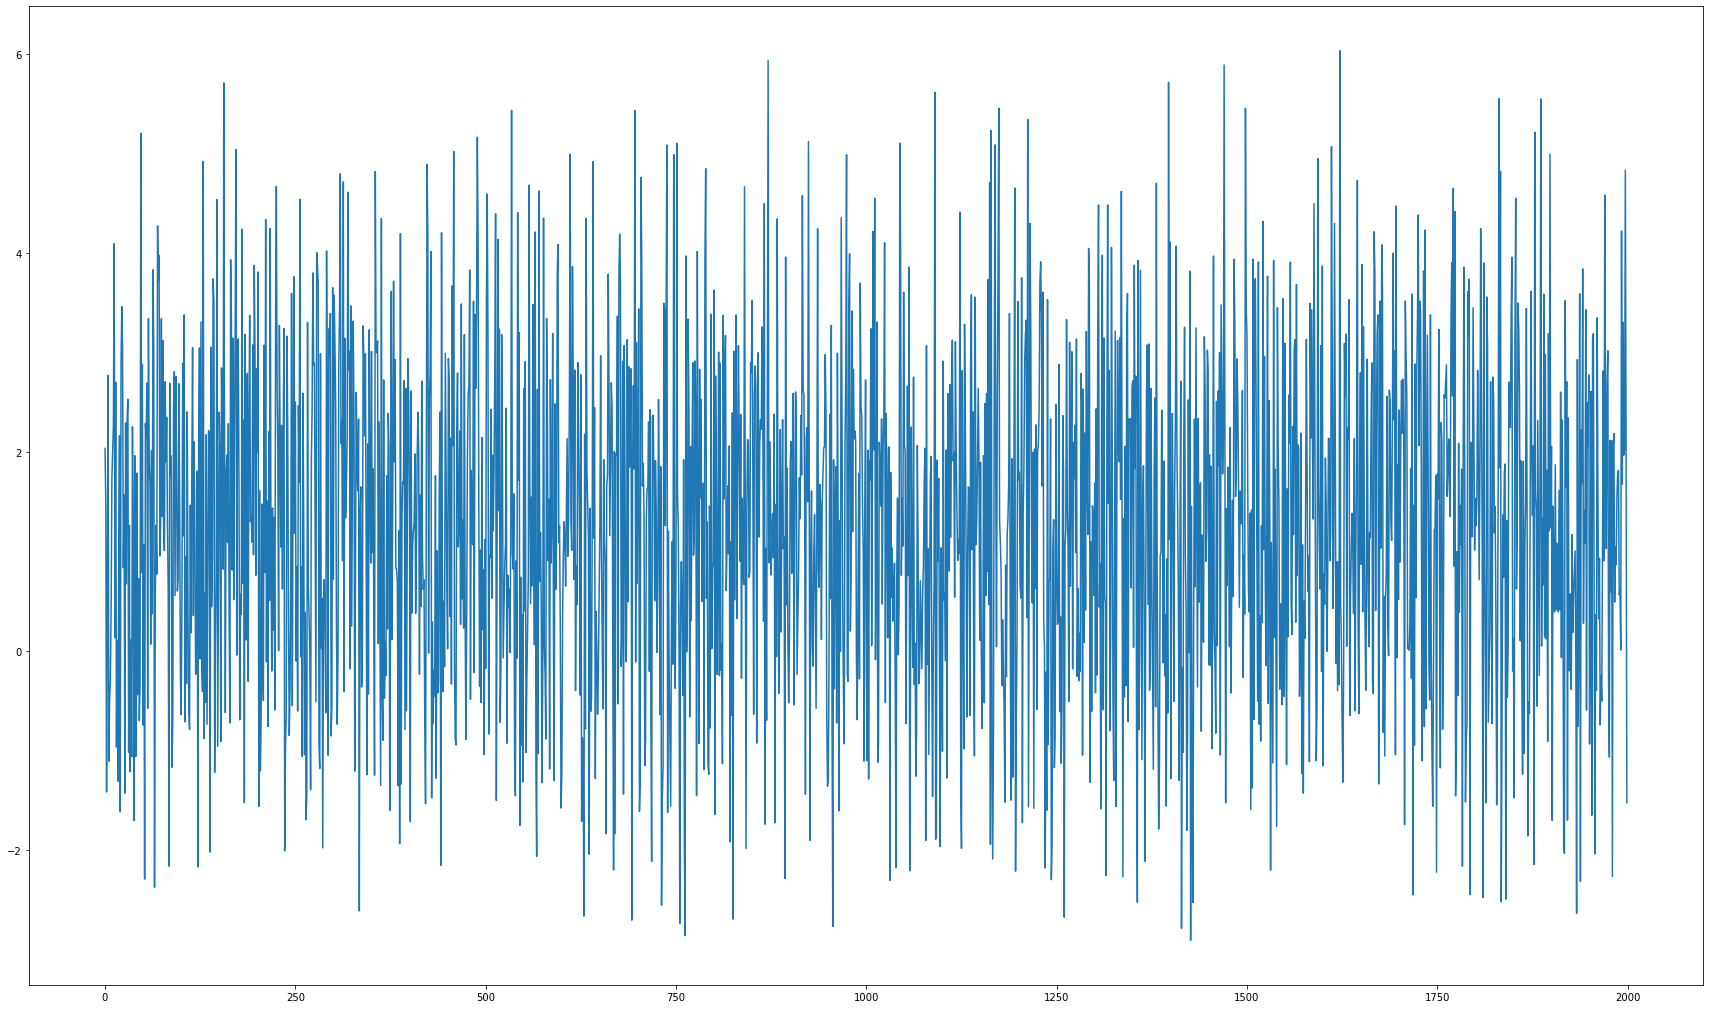

In [392]:
L=[]
for i in trajectoire:
    y = f(*i)   # i contient 2 valeurs d'où le *
    L.append(y)
plt.figure(figsize=(30, 18))
plt.plot(L)
plt.show()

### Question 6

### Recuit simulé

Prénons un schéma de temperature $T_n = C (1-\epsilon)^n$, par exemple $T_n= C \times 0.995^n$.

In [418]:
T = 35 # à ajuster (dichotomie...)
x_act = (0, 0)  # on peut commencer n'importe où
# Il faut s'assurer que la temperature initiale est **suffisamment** 
# grande pour permettre exploration assez facile de l'espce

f_min = 0
x_min = (0, 0)
elist = []
max_iter = 3000  # à ajuster!
for i in range(max_iter):
    # on considère de faire un pas à partir 
    # de la position actuelle
    x_neuf = un_pas(*x_act)       # x_act contient 2 valeurs d'où le *
    if f(*x_neuf) < f(*x_act):
        # on accepte un nouveau état si la valeur de la fonction 
        # est plus petite (minimisation)
        x_act = x_neuf
    else:
        # ici la nouvelle position est moins bonne
        # c.a.d f(x_act) <= f(x_neuf)
        p_accept = np.exp((f(*x_act) - f(*x_neuf)) / T)  # dans [0,1]
        if rand() < p_accept:
            # on accepte le nouveau etat avec proba p_accept 
            # qui diminue dans le temps, car T diminue.
            x_act = x_neuf
        # sinon on reste dans le même état
    # la verification de minimum globale
    if f(*x_act) < f_min: 
        # si c'est le meilleure etat jamais observé, je le note
        # comme le nouveau minimum à retenir
        x_min = x_act
        f_min = f(*x_act)
    # Schema de temperature (refroidissement relativement rapide)
    T = T * 0.995
    # dans tous les cas, je note l'energie actuelle pour une visu
    elist.append(f(*x_act))

In [419]:
print('la dernière position est :', x_act)
print('la valeur minimal trouvéé est :', f_min)
print("les arguments x, y de cette valeur sont :", x_min)

la dernière position est : (-0.020771893613054537, -0.493406169777563)
la valeur minimal trouvéé est : -3.1247505859777815
les arguments x, y de cette valeur sont : (-0.020771893613054537, -0.493406169777563)


### Après avoir essayer plusieurs valeurs initiales de la temperature T et d'itérations max_iter, les "meilleures" valeurs initiales semblent etre autour de T=35 et max_iter = 3000.

**Affichons l'evolution de la valeur courante de la fonction durant la recherche pour mettre en évidence
ce "bon" caractère de l'exploration :**

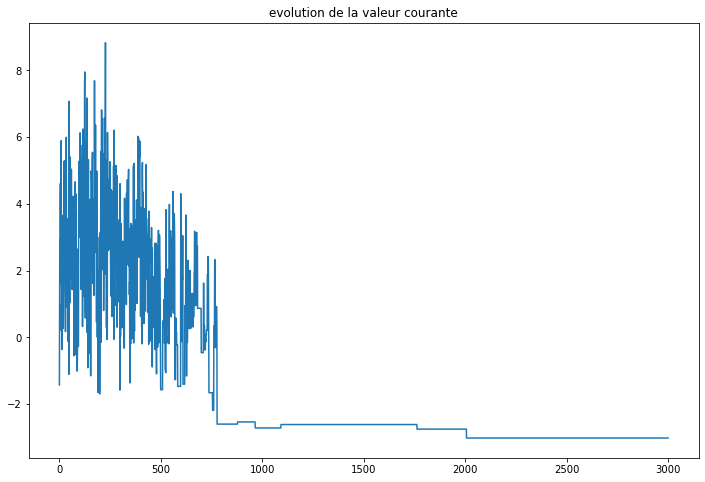

In [394]:
plt.figure(figsize=(12, 8))
plt.plot(elist)
plt.title("evolution de la valeur courante")
plt.show()  
# Ici on voit d'abord une exploration, puis exploitation

In [336]:
T

1.0311225424484995e-05

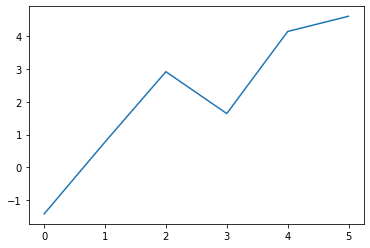

In [406]:
plt.plot(elist[:6])
plt.show()
# on voit mieux cette exploration lors des premières étapes

## Pour comparaison essayons une deuxième méthode directe qui consiste à ecrire un code python qui permettrait de trouver le minimum de la fonction $f$ et les arguments $x$ et $y$ de cette valeur. Appelons la "methode de descente simple" :

### D'abord commencons par visualiser la fonction $f(x,y)$ en 2 puis 3 dimensions.

**2 dimensions :**

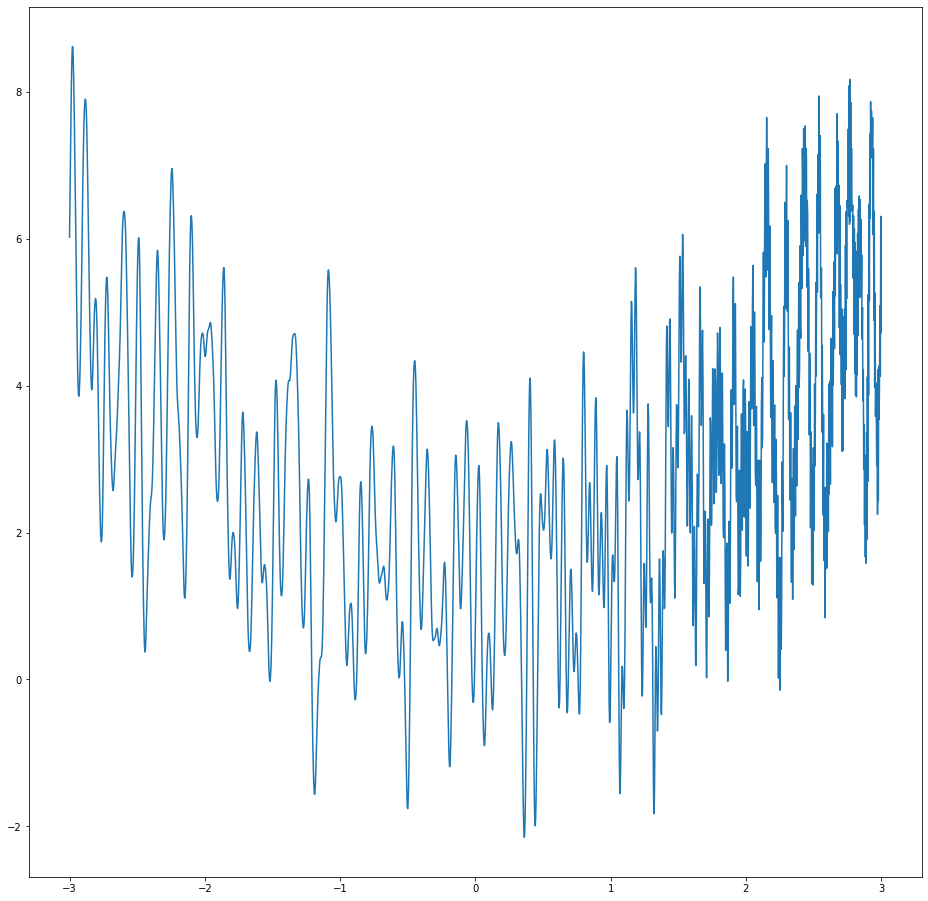

In [413]:
plt.figure(figsize=(16, 16))
x = np.linspace(-3, 3, 2000)
y = np.linspace(-3, 3, 2000)
plt.plot(x, f(x, y))
plt.show()

**3 dimensions :**

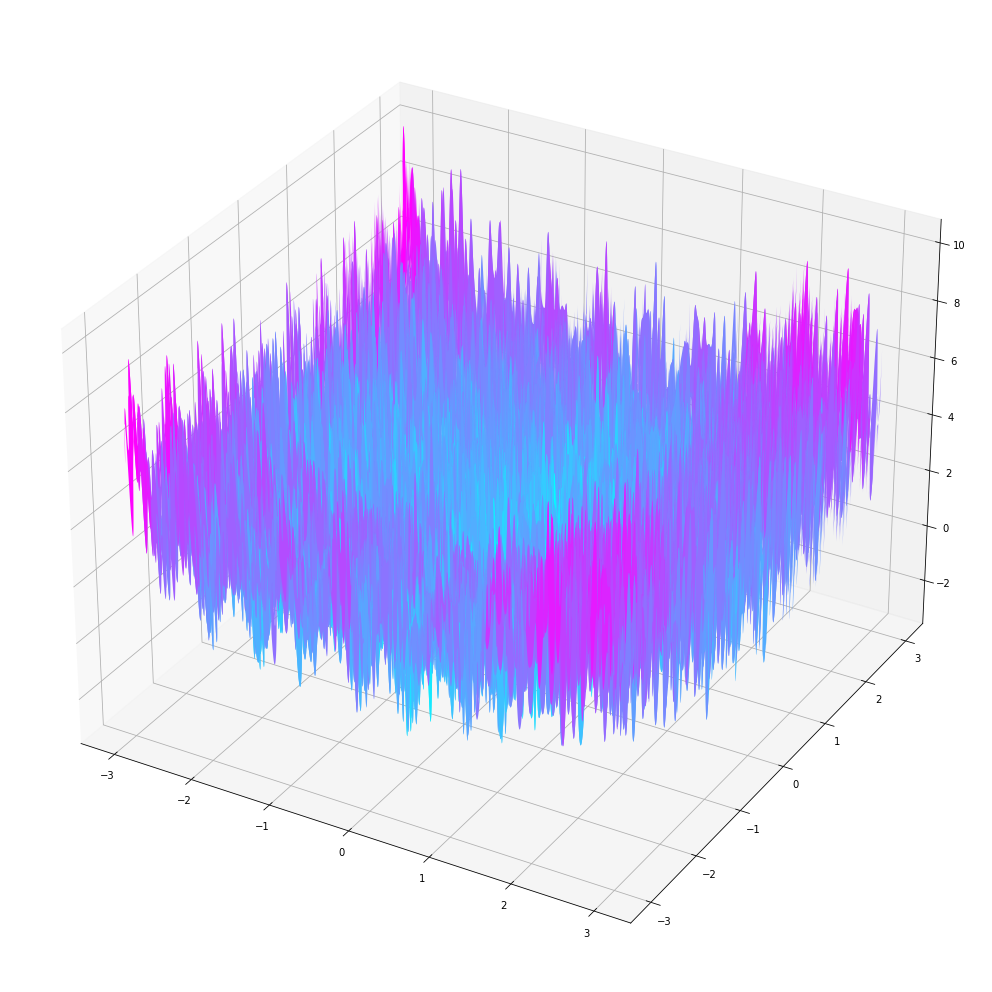

In [410]:
x = np.linspace(-3, 3, 2000)
y = np.linspace(-3, 3, 2000)
x, y = np.meshgrid(x, y)
z = f(x,y)

plt.figure(figsize=(18, 18))
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, z, cmap='cool')
plt.show()

**Le code python pour une deuxième méthode de "descente simple" :**

In [408]:
# descente simple

m=f(0,0)    # partons d'une valeur localisée à l'origine
L=[(0,0)]   # recuperons ses arguments
for x in np.linspace(-3,3, 2000):
    for y in np.linspace(-3,3,2000):
        if m>f(x,y):    # si la valeur d'où on est partie est superieure à une valeur que nous rencontrons
            m=f(x,y)    # c'est à dire que la nouvelle valeur est plus petite donc nous la gardons
            L=[(x,y)]   # et on garde ses arguments
        elif m==f(x,y): # et sinon si il n'y a plus de valeur plus petite que celle que nous avons alors c'est notre minimum
            L.append((x,y))   # et on garde ses arguments

print('la valeur minimale trouvéé est :', m)
print("les arguments x, y de cette valeur sont :", L)

la valeur minimale trouvéé est : -3.29849253980797
les arguments x, y de cette valeur sont : [(-0.02551275637818895, 0.2116058029014507)]


## En conclusion les valeurs minimales trouvées par les 2 méthodes sont très proches l'une de l'autre (autour de ${-3.3}$) ainsi que les arguments $x$ et $y$.

## Mais bien que la méthode du récuit "ne donne qu'une" valeur approchée du minimum sans toute fois nous certifier que c'est la solution optimale, elle nous permet de sortir des minimums locaux.